# 02_Gradient-Based
## 50 min

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

model = ResNet50(weights="imagenet", include_top=True)

2022-02-17 18:37:58.006664: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-17 18:37:59.669192: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-17 18:37:59.670289: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-17 18:37:59.797168: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-02-17 18:37:59.797199: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-17 18:37:59.800260: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.

In [2]:
def read_image(file_name, target_size):
    img = cv2.imread(file_name)[:,:,::-1].astype('float32')
    height, width, _ = img.shape
    long_side = max(height, width)
    img_pad = np.zeros((long_side, long_side, 3), dtype=img.dtype)
    h = (long_side-height)//2
    w = (long_side-width)//2
    img_pad[h:h+height, w:w+width] = img
    img = cv2.resize(img_pad, (target_size, target_size))
    return img

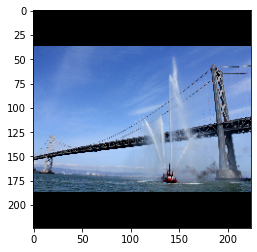

In [3]:
IMAGE_PATH = "Fireboat.jpg"
target_size = 224
img = read_image(IMAGE_PATH, target_size)
data = (preprocess_input(tf.expand_dims(img, axis=0)), None)
plt.imshow(img/255)

## 1. Sensitivity analysis

2022-02-17 18:38:08.548157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-17 18:38:08.565568: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3200025000 Hz
2022-02-17 18:38:09.196537: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-02-17 18:38:09.463892: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-02-17 18:38:09.468405: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


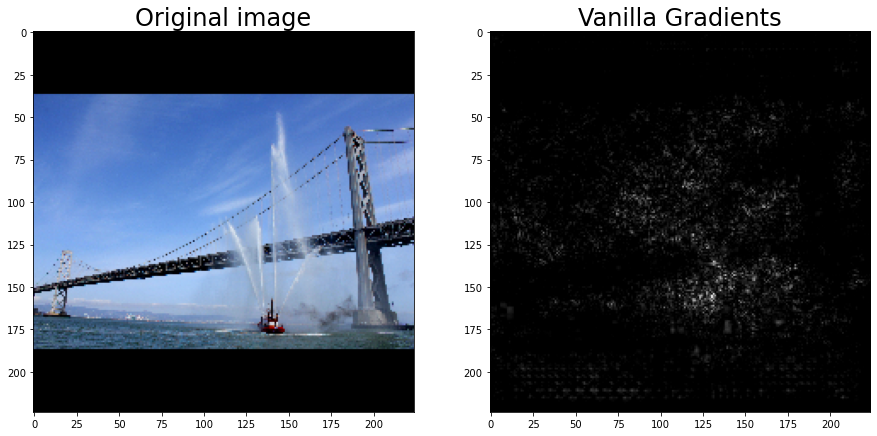

In [4]:
# Import explainer
from tf_explain.core.vanilla_gradients import VanillaGradients

fire_boat_class_index = 554

# Instantiation of the explainer
explainer = VanillaGradients()
# Call to explain() method
output = explainer.explain(data, model, fire_boat_class_index)
# plot output
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img/255)
plt.title('Original image', fontsize=24)
plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.title('Vanilla Gradients', fontsize=24)
plt.show()

## 2. SmoothGrad

2022-02-17 18:38:21.933819: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-17 18:38:21.954396: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-17 18:38:21.981766: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-02-17 18:38:22.037503: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Alloc

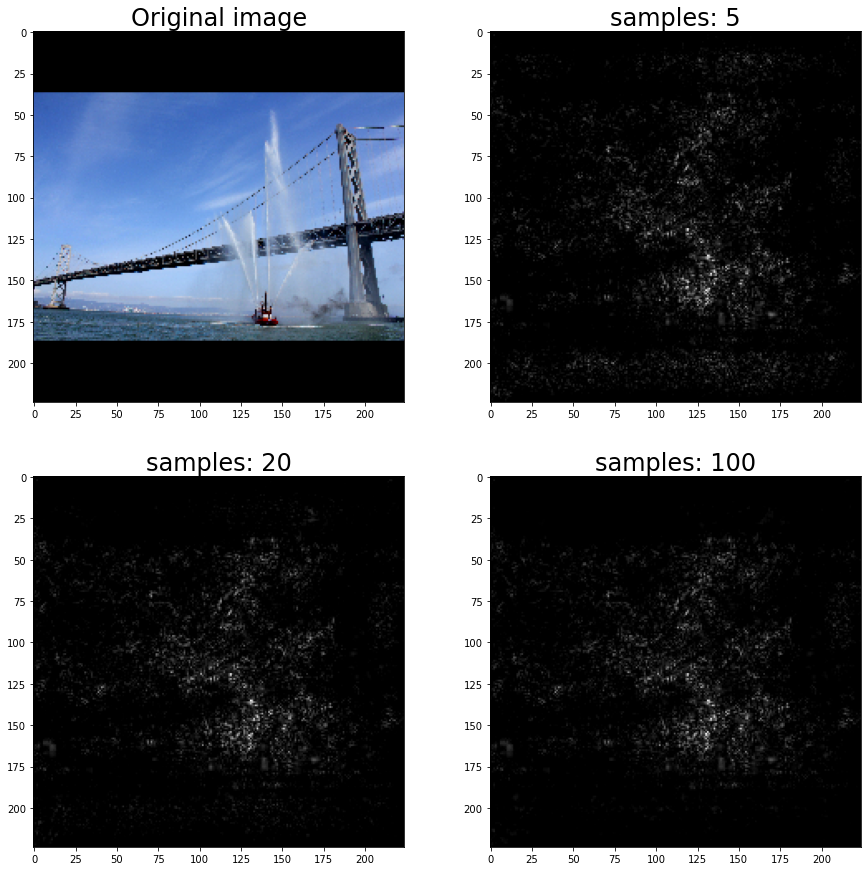

In [5]:
# Import explainer
from tf_explain.core.smoothgrad import SmoothGrad

fire_boat_class_index = 554
num_samples = [5, 20, 100] 
noise = 1.0

# Compute Smooth gradient for each num_samples
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.imshow(img/255)
plt.title('Original image', fontsize=24)
for i, num_sample in enumerate(num_samples):
    # Instantiation of the explainer
    explainer = SmoothGrad()
    output = explainer.explain(data, model, fire_boat_class_index, num_sample, noise)
    # plot output
    plt.subplot(2,2,i+2)
    plt.imshow(output, cmap='gray')
    plt.title(f'samples: {num_sample}', fontsize=24)
plt.show()

## 3. Integrated Gradients

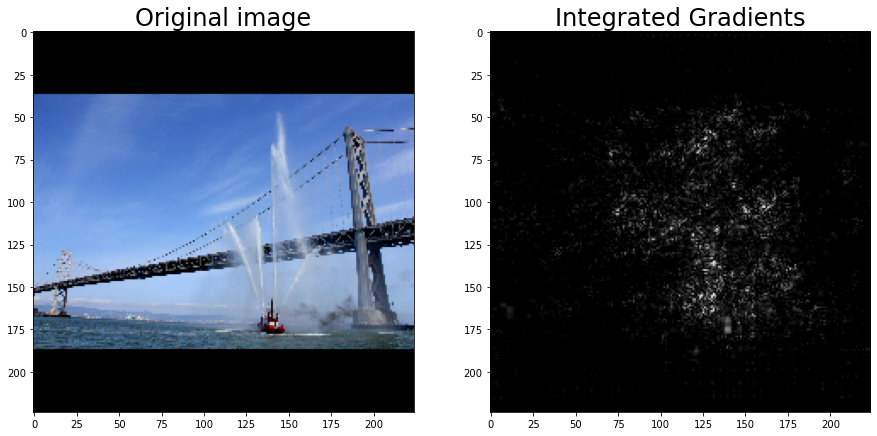

In [6]:
# Import explainer
from tf_explain.core.integrated_gradients import IntegratedGradients

fire_boat_class_index = 554
n_steps = 15

# Instantiation of the explainer
explainer = IntegratedGradients()
# Call to explain() method
output = explainer.explain(data, model, fire_boat_class_index, n_steps)
# plot output
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(img/255)
plt.title('Original image', fontsize=24)
plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.title('Integrated Gradients', fontsize=24)
plt.show()